In [13]:
#Yanyi Wu 1003775104
#INF 2178 Midterm Project
#Professor Shion Guha
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random # random library
pallete = ['Accent_r', 'Blues', 'BrBG'
           , 'BrBG_r', 'BuPu', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'OrRd', 'Oranges', 'Paired', 'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdGy_r', 'RdPu', 'Reds', 'autumn', 'cool', 'coolwarm', 'flag', 'flare', 'gist_rainbow', 'hot', 'magma', 'mako', 'plasma', 'prism', 'rainbow', 'rocket', 'seismic', 'spring', 'summer', 'terrain', 'twilight']



In [14]:
#Read file
df=pd.read_csv('D:/U of T/Winter 2022/INF 2178/Midterm/diabetes.csv')
df=df.drop(columns=['SkinThickness'])

In [15]:
#File Overview
df.describe()

Pregnancies     Glucose  BloodPressure     Insulin         BMI  \
count   768.000000  768.000000     768.000000  768.000000  768.000000   
mean      3.845052  120.894531      69.105469   79.799479   31.992578   
std       3.369578   31.972618      19.355807  115.244002    7.884160   
min       0.000000    0.000000       0.000000    0.000000    0.000000   
25%       1.000000   99.000000      62.000000    0.000000   27.300000   
50%       3.000000  117.000000      72.000000   30.500000   32.000000   
75%       6.000000  140.250000      80.000000  127.250000   36.600000   
max      17.000000  199.000000     122.000000  846.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome  
count                768.000000  768.000000  768.000000  
mean                   0.471876   33.240885    0.348958  
std                    0.331329   11.760232    0.476951  
min                    0.078000   21.000000    0.000000  
25%                    0.243750   24.000000    0.000000  
50%                    0.372500   29.000000    0.000000  
75%                    0.626250   41.000000    1.000000  
max                    2.420000   81.000000    1.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


Text(0.5, 1.0, 'Boxplot for raw data')

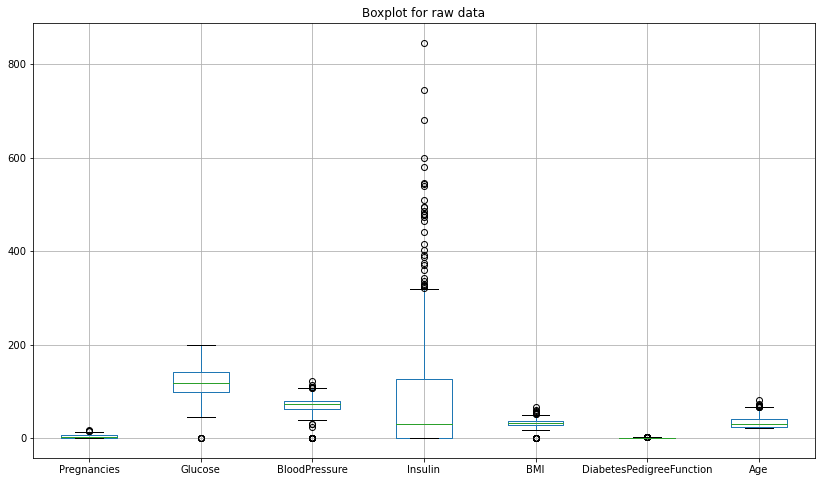

In [16]:
#Boxplot Diagram
df.info()
plt.figure(figsize=(14,8))
df.boxplot(column=['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']) 
plt.title('Boxplot for raw data')

Text(0.5, 1.0, 'Boxplot for data after removing outliers')

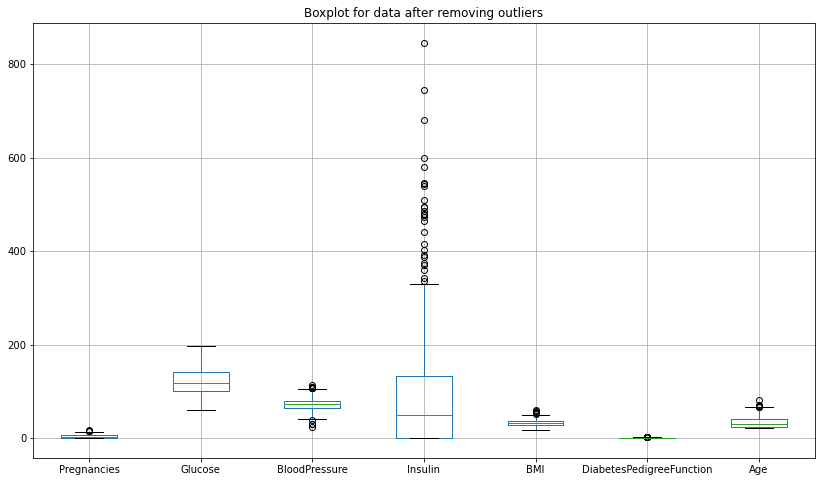

In [17]:
df=df[df.BMI > df.BMI.quantile(.01)]
df=df[df.BMI < df.BMI.quantile(.999)]
df=df[df.Glucose > df.Glucose.quantile(.01)]
df=df[df.Glucose < df.Glucose.quantile(.999)]
df=df[df.BloodPressure > df.BloodPressure.quantile(.01)]
df=df[df.BloodPressure < df.BloodPressure.quantile(.999)]

plt.figure(figsize=(14,8))
df.boxplot(column=['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']) 
plt.title('Boxplot for data after removing outliers')

In [18]:
len(df)

717

<AxesSubplot:xlabel='Outcome', ylabel='count'>

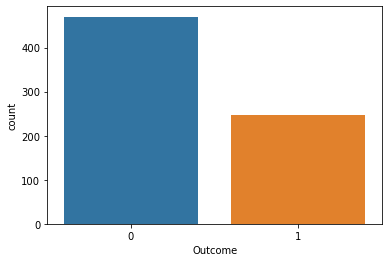

In [19]:
#Different Outcome Count
sns.countplot(x="Outcome", data=df)

In [20]:
#Check Unique Values
uniques = []

for col in df.columns:
    num_uniques = df[col].nunique()
    pct_uniques = round((num_uniques / len(df[col])) * 100,2)
    temp_list = [col, num_uniques, pct_uniques]
    uniques.append(temp_list)

In [21]:
from tabulate import tabulate
print(tabulate(uniques, headers=['Column', 'Number of Unique Values', 'Percentage of Unique Values']))

ModuleNotFoundError: No module named 'tabulate'

In [48]:
#Check and Drop Repeated Column
df = df.drop_duplicates(df.columns, keep = 'last')
sum(df.duplicated(df.columns))

0

In [23]:
#Check the missing Data
print("Percentage of Missing Data:")
for i in df.columns:
    print(str(i) + ":"+ str((round(sum(df[i].isna()) / len(df),3)*100))[:4]+'%')

Percentage of Missing Data:
Pregnancies:0.0%
Glucose:0.0%
BloodPressure:0.0%
Insulin:0.0%
BMI:0.0%
DiabetesPedigreeFunction:0.0%
Age:0.0%
Outcome:0.0%


<AxesSubplot:xlabel='Age', ylabel='Count'>

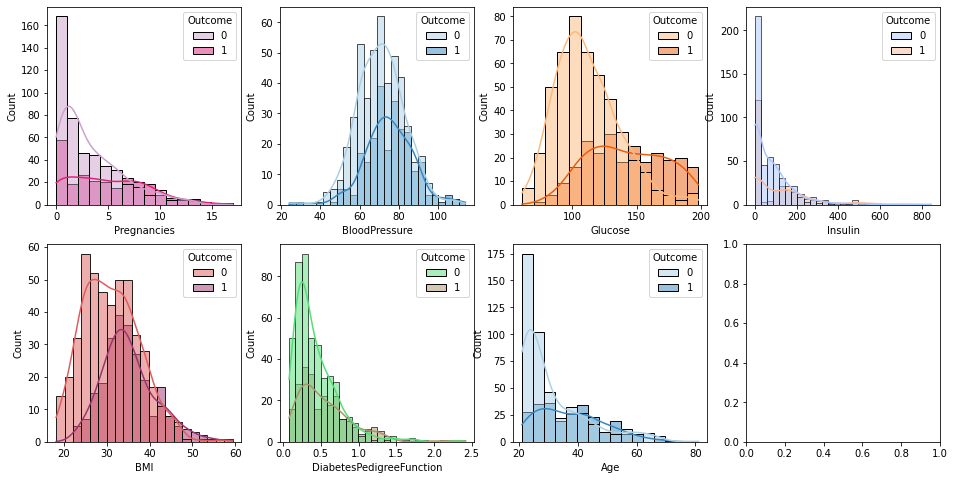

In [24]:
#Hisplot for all variables
fig, ax = plt.subplots(2,4, figsize=(16,8))
sns.histplot(x="Pregnancies", hue="Outcome", data=df, kde=True, palette=random.choice(pallete),ax=ax[0,0])
sns.histplot(x="BloodPressure", hue="Outcome", data=df, kde=True, palette=random.choice(pallete), ax=ax[0,1]) 
sns.histplot(x="Glucose", hue="Outcome", data=df, kde=True, palette=random.choice(pallete),ax=ax[0,2]) 
sns.histplot(x="Insulin", hue="Outcome", data=df, kde=True, palette=random.choice(pallete),ax=ax[0,3]) 
sns.histplot(x="BMI", hue="Outcome", data=df, kde=True, palette=random.choice(pallete),ax=ax[1,0])
sns.histplot(x="DiabetesPedigreeFunction", hue="Outcome", data=df, kde=True, palette=random.choice(pallete),ax=ax[1,1]) 
sns.histplot(x="Age", hue="Outcome", data=df, kde=True, palette=random.choice(pallete), ax=ax[1,2]) 

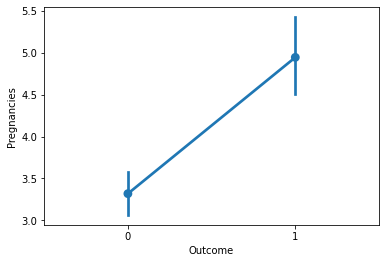

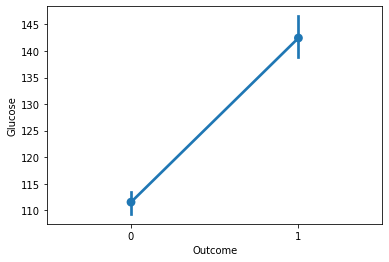

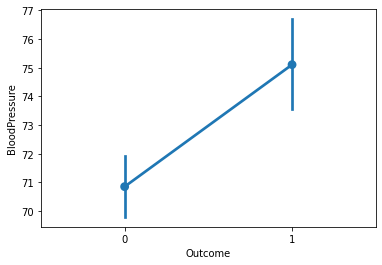

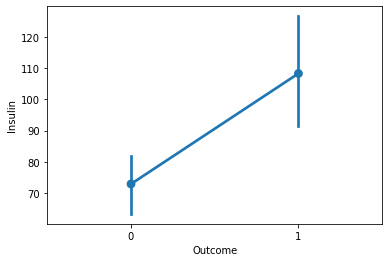

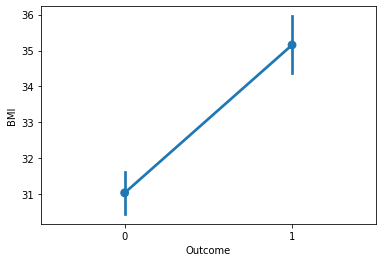

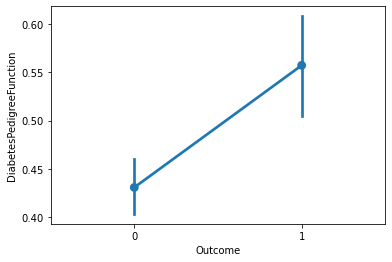

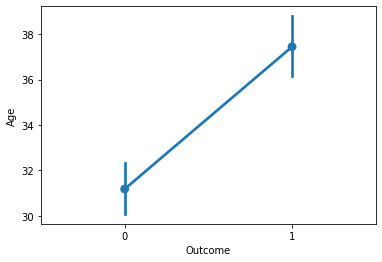

In [25]:
#PointPlot for all variables
for i in ['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']:
    sns.pointplot(x='Outcome', y= i, data=df) 
    plt.show()

<AxesSubplot:>

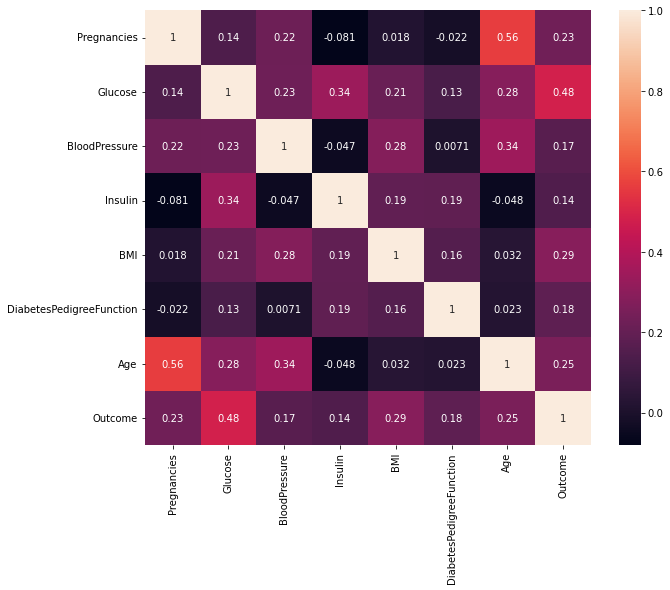

In [26]:
#Heatmap for all variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:xlabel='Pregnancies', ylabel='Age'>

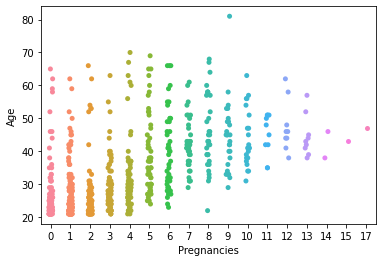

In [27]:
#Sublploe with Pregnancies and Age
sns.stripplot(x='Pregnancies',y='Age',data=df)

In [51]:
#T-Test
from scipy import stats
not_diabetes = df.query('Outcome == "0"')['Age']
diabetes = df.query('Outcome == "1"')['Age']
stats.ttest_ind(not_diabetes, diabetes, equal_var=False)

Ttest_indResult(statistic=nan, pvalue=nan)

In [30]:
df['BloodRange']=pd.cut(df.BloodPressure,bins=[0,80,140],labels=['Normal','High Blood Pressure'])
total=df.groupby('BloodRange').count()[['Outcome']].reset_index()
total


BloodRange  Outcome
0               Normal      556
1  High Blood Pressure      161

Text(0, 0.5, 'Observations')

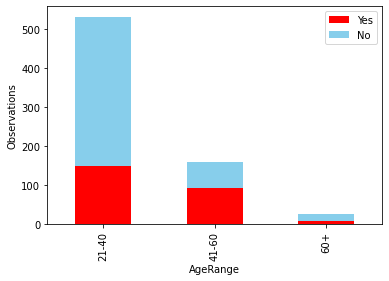

In [31]:
#Outcome count for different age group
df['AgeRange']=pd.cut(df.Age,bins=[20,40,60,81],labels=['21-40','41-60','60+'])
total=df.groupby('AgeRange').count()[['Outcome']].reset_index()
total = total.rename(columns=lambda x: x.replace('Outcome', 'Total'))
total['Yes']=df.groupby('AgeRange').sum()[['Outcome']].reset_index()['Outcome']
total['No']=total['Total']-total['Yes']
total=total.drop(columns=['Total'])
total.index=total.AgeRange
total.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])
plt.ylabel('Observations')

In [32]:
stats.f_oneway(df['Outcome'][df['AgeRange'] == '21-40'],
               df['Outcome'][df['AgeRange'] == '41-60'],
               df['Outcome'][df['AgeRange'] == '60+'])

F_onewayResult(statistic=24.408435841623117, pvalue=5.5746558534606525e-11)

Text(0, 0.5, 'Observations')

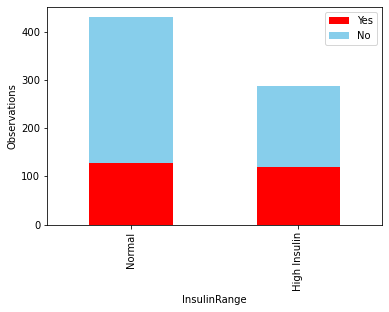

In [50]:
#Outcome count for normal and high insulin
df['InsulinRange']=pd.cut(df.Insulin,bins=[-1,80,900],labels=['Normal','High Insulin'])
total=df.groupby('InsulinRange').count()[['Outcome']].reset_index()
total=df.groupby('InsulinRange').count()[['Outcome']].reset_index()
total = total.rename(columns=lambda x: x.replace('Outcome', 'Total'))
total['Yes']=df.groupby('InsulinRange').sum()[['Outcome']].reset_index()['Outcome']
total['No']=total['Total']-total['Yes']
total=total.drop(columns=['Total'])
total.index=total.InsulinRange
total.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])
plt.ylabel('Observations')

Text(0, 0.5, 'Observations')

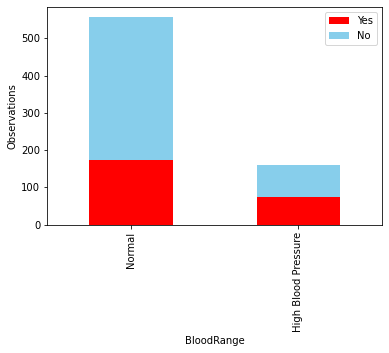

In [34]:
#Outcome for noral and high blood pressure group
df['BloodRange']=pd.cut(df.BloodPressure,bins=[0,80,140],labels=['Normal','High Blood Pressure'])
total=df.groupby('BloodRange').count()[['Outcome']].reset_index()
total=df.groupby('BloodRange').count()[['Outcome']].reset_index()
total = total.rename(columns=lambda x: x.replace('Outcome', 'Total'))
total['Yes']=df.groupby('BloodRange').sum()[['Outcome']].reset_index()['Outcome']
total['No']=total['Total']-total['Yes']
total=total.drop(columns=['Total'])
total.index=total.BloodRange
total.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])
plt.ylabel('Observations')

In [35]:
#Linear Regression 
y=df['Outcome']
X=df[['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']]

In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [39]:
model=ols(formula='Outcome~Pregnancies+Glucose+BloodPressure+Insulin+BMI+DiabetesPedigreeFunction+C(AgeRange)',data=df)


In [40]:
r1=model.fit()
r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     42.69
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           7.94e-56
Time:                        18:48:31   Log-Likelihood:                -342.79
No. Observations:                 717   AIC:                             703.6
Df Residuals:                     708   BIC:                             744.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.9432      0.109     -8.655      0.000      -1.157      -0.729
C(AgeRange)[T.41-60]         0.1307      0.042      3.109      0.002       0.048       0.213
C(AgeRange)[T.60+]          -0.1420      0.085     -1.672      0.095      -0.309       0.025
Pregnancies                  0.0169      0.005      3.285      0.001       0.007       0.027
Glucose                      0.0067      0.001     12.290      0.000       0.006       0.008
BloodPressure               -0.0015      0.001     -1.153      0.249      -0.004       0.001
Insulin                     -0.0002      0.000     -1.628      0.104      -0.000    4.67e-05
BMI                          0.0133      0.002      5.663      0.000       0.009       0.018
DiabetesPedigreeFunction     0.1535      0.046      3.371      0.001       0.064       0.243
==============================================================================
Omnibus:                       23.896   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.612
Skew:                           0.367   Prob(JB):                     2.03e-05
Kurtosis:                       2.570   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
sm.stats.anova_lm(r1, typ=2)

sum_sq     df           F        PR(>F)
C(AgeRange)                 2.281816    2.0    7.395586  6.625644e-04
Pregnancies                 1.664342    1.0   10.788587  1.071549e-03
Glucose                    23.302006    1.0  151.048103  1.321247e-31
BloodPressure               0.205127    1.0    1.329671  2.492529e-01
Insulin                     0.408799    1.0    2.649913  1.040004e-01
BMI                         4.946582    1.0   32.064703  2.168215e-08
DiabetesPedigreeFunction    1.753537    1.0   11.366765  7.883192e-04
Residual                  109.222293  708.0         NaN           NaN

In [43]:
model=ols(formula='Outcome~C(BloodRange)+C(InsulinRange)+C(AgeRange)',data=df)
r2=model.fit()
r2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     18.03
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           4.06e-14
Time:                        18:49:07   Log-Likelihood:                -449.32
No. Observations:                 717   AIC:                             908.6
Df Residuals:                     712   BIC:                             931.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                0.2029      0.026      7.889      0.000       0.152       0.253
C(BloodRange)[T.High Blood Pressure]     0.1114      0.041      2.689      0.007       0.030       0.193
C(InsulinRange)[T.High blood sugar]      0.1340      0.035      3.838      0.000       0.065       0.203
C(AgeRange)[T.41-60]                     0.2768      0.042      6.643      0.000       0.195       0.359
C(AgeRange)[T.60+]                       0.0359      0.096      0.374      0.708      -0.152       0.224
==============================================================================
Omnibus:                      543.990   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.232
Skew:                           0.614   Prob(JB):                     6.93e-20
Kurtosis:                       1.797   Cond. No.                         6.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
sm.stats.anova_lm(r2, typ=2)

sum_sq     df          F        PR(>F)
C(BloodRange)      1.492813    1.0   7.229678  7.338561e-03
C(InsulinRange)    3.041274    1.0  14.728864  1.351643e-04
C(AgeRange)        9.147095    2.0  22.149649  4.655018e-10
Residual         147.016586  712.0        NaN           NaN

In [45]:
df['BloodRange']=pd.cut(df.BloodPressure,bins=[0,80,140],labels=['Normal','High Blood Pressure'])
total=df.groupby('BloodRange').count()[['Outcome']].reset_index()
total


BloodRange  Outcome
0               Normal      556
1  High Blood Pressure      161

In [46]:
model=ols(formula='Outcome~Pregnancies+Glucose+C(BloodRange)+C(InsulinRange)+BMI+DiabetesPedigreeFunction+C(AgeRange)',data=df)


In [47]:
r3=model.fit()
r3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     42.13
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           3.51e-55
Time:                        18:50:34   Log-Likelihood:                -344.33
No. Observations:                 717   AIC:                             706.7
Df Residuals:                     708   BIC:                             747.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -1.0038      0.089    -11.306      0.000      -1.178      -0.829
C(BloodRange)[T.High Blood Pressure]    -0.0177      0.037     -0.475      0.635      -0.091       0.055
C(InsulinRange)[T.High blood sugar]     -0.0180      0.032     -0.561      0.575      -0.081       0.045
C(AgeRange)[T.41-60]                     0.1247      0.042      2.979      0.003       0.043       0.207
C(AgeRange)[T.60+]                      -0.1377      0.085     -1.619      0.106      -0.305       0.029
Pregnancies                              0.0170      0.005      3.323      0.001       0.007       0.027
Glucose                                  0.0065      0.001     12.142      0.000       0.005       0.008
BMI                                      0.0126      0.002      5.428      0.000       0.008       0.017
DiabetesPedigreeFunction                 0.1491      0.045      3.277      0.001       0.060       0.238
==============================================================================
Omnibus:                       22.563   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.709
Skew:                           0.362   Prob(JB):                     3.18e-05
Kurtosis:                       2.589   Cond. No.                         792.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""